# Learning and practicing NumPy with examples and exercises

In [1]:
import numpy as np

In [2]:
arr = np.array([3, 7, 1, 9, 5])
print(f"Third: {arr[2]}\nSlice: {arr[1:4]}")

#Change fourth element
print(arr)
arr[3] = 12
print(arr)


Third: 1
Slice: [7 1 9]
[3 7 1 9 5]
[ 3  7  1 12  5]


In [3]:
tensor = np.array(range(1,37)).reshape(3,3,4)
print(f"Tensor: \n{tensor}")
print(f"Element (1, 0, 2): {tensor[1,0,2]} \n")
print(f"Subtensor: \n {tensor[1]} \n")
print(f"Subtensor: \n {tensor[1:3,2,:]}\n")
print(f"Element (2, 1, 3): {tensor[2,1,3]}\n")
print(f"Subtensor: \n {tensor[1:3,0, :]}")


Tensor: 
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]

 [[25 26 27 28]
  [29 30 31 32]
  [33 34 35 36]]]
Element (1, 0, 2): 15 

Subtensor: 
 [[13 14 15 16]
 [17 18 19 20]
 [21 22 23 24]] 

Subtensor: 
 [[21 22 23 24]
 [33 34 35 36]]

Element (2, 1, 3): 32

Subtensor: 
 [[13 14 15 16]
 [25 26 27 28]]


In [3]:
def calculate_average(nums: list) -> float:
    arr = np.array(nums)
    return np.mean(arr)
numbers = list(range(1,11))
print(f"Average of {calculate_average(numbers)}")

Average of 5.5


In [4]:
def find_power(base, exponent=2):
    return np.pow(base, exponent)
print(find_power(2))

4


In [4]:
X = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([3,6,8,11,13]).reshape(-1,1)

#Bias term
X = np.c_[np.ones(X.shape[0]), X]

print(f"Shape of X: {X.shape} \nShape of y: {y.shape}")

theta = np.array([0.0, 0.0]).reshape(2,1)

alpha = 0.01
iterations = 10000
m = len(y)
for i in range(iterations):
    grad = (1/m) * X.T @ (X@theta - y)
    theta = theta - alpha*grad

# Resultados
print(f"Después de {iterations} iteraciones:")
print(f"theta0 = {theta[0, 0]:.4f}")
print(f"theta1 = {theta[1, 0]:.4f}")
    

Shape of X: (5, 2) 
Shape of y: (5, 1)
Después de 10000 iteraciones:
theta0 = 0.7000
theta1 = 2.5000


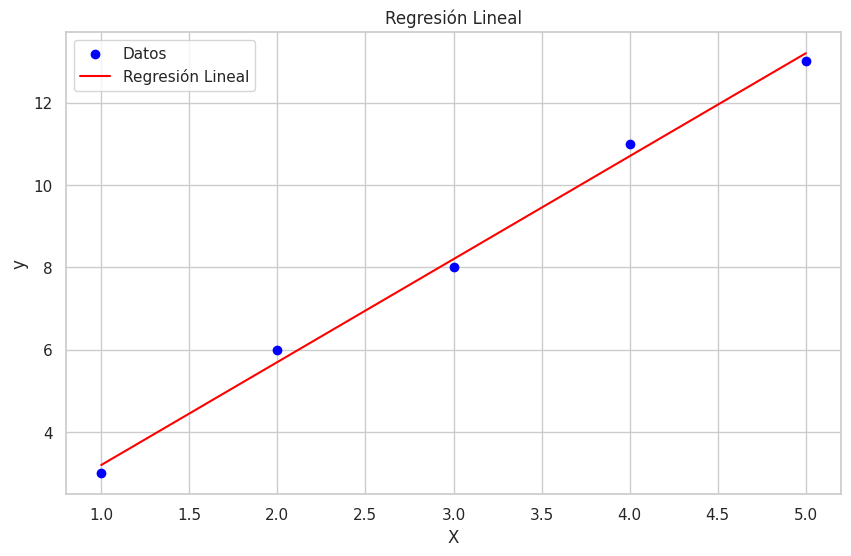

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='blue', label='Datos')
plt.plot(X[:, 1], X @ theta, color='red', label='Regresión Lineal')
plt.title('Regresión Lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
